# tytuł heheh

## importy

In [1]:
%%capture --no-stderr

import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MultiLabelBinarizer
from datetime import datetime
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv', low_memory=False)

## funkcje

In [3]:
def History_Age_2_months(df):
    df['Credit_History_Age'] = df['Credit_History_Age'].str.replace(' Months', '')
    return df['Credit_History_Age'].str.replace('\D+', '* 12 +')
def Object_to_Numeric(df, s):
    return pd.to_numeric(df[s].str.replace('_', ''))

## basic zaznajomienie

In [4]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
df['ID'].drop_duplicates().shape[0]
# każdy wiersz ma swoje id więc wszystkie wpisy w tabeli są unikalne
# df = df.drop(columns = ['ID', 'Name', 'SSN'])

100000

## zamiana typów kolumn na numeryczne

#### wojtuś uwu

In [8]:
df['Outstanding_Debt'] = Object_to_Numeric(df, 'Outstanding_Debt')
df['Amount_invested_monthly'] = Object_to_Numeric(df, 'Amount_invested_monthly')
df['Changed_Credit_Limit'] = Object_to_Numeric(df, 'Changed_Credit_Limit')
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace('_', '')
df = df.astype({'Monthly_Balance': 'float'})

In [9]:
df['Credit_History_Age'] = History_Age_2_months(df)
df['Credit_History_Age'].loc[df.Credit_History_Age.isnull()] = df['Credit_History_Age'].loc[df.Credit_History_Age.isnull()].apply(
        lambda x: '-1') #Brak danych jest teraz -1
df['Credit_History_Age'] = df['Credit_History_Age'].apply(eval)

C:\Users\wwier\AppData\Local\Temp\ipykernel_17560\2355454557.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  return df['Credit_History_Age'].str.replace('\D+', '* 12 +')
C:\Users\wwier\AppData\Local\Temp\ipykernel_17560\2810006821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit_History_Age'].loc[df.Credit_History_Age.isnull()] = df['Credit_History_Age'].loc[df.Credit_History_Age.isnull()].apply(


In [10]:
le = preprocessing.LabelEncoder()
df['Payment_of_Min_Amount'] = le.fit_transform(df['Payment_of_Min_Amount'])
df['Payment_Behaviour'] = np.where(df['Payment_Behaviour']== '!@9#%8', np.nan, df['Payment_Behaviour'])
df['spent'] = np.where('Low' == df['Payment_Behaviour'].str[0:3], 0,1)
df['payment_value'] = df['Payment_Behaviour'].str.extract(r'^(?:[^_]+_){2}([^_ ]+)')
df['payment_value'] = le.fit_transform(df['payment_value'])
df['payment_value'] = np.where(df['payment_value'] == 3, np.nan, df['payment_value'])
df = df.drop('Payment_Behaviour', axis=1)

In [11]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and ', '')
df.Type_of_Loan = df.Type_of_Loan.str.split(', ')
df['Type_of_Loan'].loc[df.Type_of_Loan.isnull()] = df['Type_of_Loan'].loc[df.Type_of_Loan.isnull()].apply(lambda x: [])
mlb = MultiLabelBinarizer(sparse_output=True)
df = df.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df.pop('Type_of_Loan')),
        index=df.index,
        columns=mlb.classes_))

C:\Users\wwier\AppData\Local\Temp\ipykernel_17560\1879291088.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type_of_Loan'].loc[df.Type_of_Loan.isnull()] = df['Type_of_Loan'].loc[df.Type_of_Loan.isnull()].apply(lambda x: [])


#### ten drugi łeb

In [12]:
#2 Month na numeric
df['Month'] = df['Month'].apply(lambda mname: datetime.strptime(mname, '%B').month)

#4 Age na numeric
df['Age'] = df['Age'].convert_dtypes().apply(lambda x: x.replace("_", "")).astype(int)

#7 Annual_Income na numeric
df['Annual_Income'] = df['Annual_Income'].convert_dtypes().apply(lambda x: x.replace("_", "")).astype(float)

#12 Num_of_Loan na numeric
df['Num_of_Loan'] = df['Num_of_Loan'].convert_dtypes().apply(lambda x: x.replace("_", "")).astype(int)

#15 Num_of_Delayed_Payment na numeric
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].convert_dtypes()
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'])

In [13]:
# Credit_Mix na numeric
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)
df['Credit_Mix'] = df['Credit_Mix'].replace('Good', 2)
df['Credit_Mix'] = df['Credit_Mix'].replace('Standard', 1)
df['Credit_Mix'] = df['Credit_Mix'].replace('Bad', 0)

# Credit_Score na numeric
df['Credit_Score'] = df['Credit_Score'].replace('Good', 2)
df['Credit_Score'] = df['Credit_Score'].replace('Standard', 1)
df['Credit_Score'] = df['Credit_Score'].replace('Poor', 0)

In [14]:
df.drop(columns=['ID','Customer_ID','Name','SSN'], inplace=True)

## Usuwanie błędnych wartości

#### wojtuś uwu

In [15]:
df.Monthly_Balance = np.where(df.Monthly_Balance == min(df.Monthly_Balance), np.nan, df.Monthly_Balance)
df.Credit_History_Age = np.where(df.Credit_History_Age == -1, np.nan, df.Credit_History_Age)
df.Amount_invested_monthly = np.where(df.Amount_invested_monthly == 10000, np.nan, df.Amount_invested_monthly)
df.Num_Bank_Accounts = np.where(df.Num_Bank_Accounts == -1, np.nan, df.Num_Bank_Accounts)

#### zimny drań 

In [16]:
df['Age'] = np.where(df['Age'] < 0, np.nan, df['Age'])

In [17]:
df['Num_of_Loan'] = np.where(df['Num_of_Loan'] < 0, np.nan, df['Num_of_Loan'])

In [18]:
df['Changed_Credit_Limit'] = np.where(df['Changed_Credit_Limit'] < 0, np.nan, df['Changed_Credit_Limit'])

## ogar nan

In [19]:
df.iloc[:, :24].describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,spent,payment_value
count,100000.000000,99114.000000,1.000000e+05,84998.000000,99979.000000,100000.00000,100000.000000,96124.000000,100000.000000,92998.000000,...,100000.000000,100000.000000,90970.000000,100000.000000,100000.000000,91216.000000,98791.000000,100000.00000,100000.000000,92400.000000
mean,4.500000,116.108421,1.764157e+05,4194.170850,17.095080,22.47443,72.466040,7.163622,21.068780,30.923342,...,1426.220376,32.285173,221.195405,1.403190,1403.118217,195.539456,402.551258,0.88830,0.502010,1.137522
std,2.291299,686.861274,1.429618e+06,3183.686167,117.416871,129.05741,466.422621,60.314923,14.860104,226.031892,...,1155.129026,5.116875,99.741364,0.693378,8306.041270,199.564527,213.925499,0.67512,0.499998,0.800785
min,1.000000,14.000000,7.005930e+03,303.645417,0.000000,0.00000,1.000000,0.000000,-5.000000,-3.000000,...,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000,0.007760,0.00000,0.000000,0.000000
25%,2.750000,25.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,...,566.072500,28.052567,144.000000,1.000000,30.306660,72.236692,270.106630,0.00000,0.000000,0.000000
50%,4.500000,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,...,1166.155000,32.305784,219.000000,2.000000,69.249473,128.954538,336.731225,1.00000,1.000000,1.000000
75%,6.250000,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,...,1945.962500,36.496663,302.000000,2.000000,161.224249,236.815814,470.262938,1.00000,1.000000,2.000000
max,8.000000,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,...,4998.070000,50.000000,404.000000,2.000000,82331.000000,1977.326102,1602.040519,2.00000,1.000000,2.000000


#### wojtuś uwu

In [20]:
#Wszystkie moje NaN można zastąpić medianą/min-max, poza 'payment_value', bo to nulle w encodingu (0/1/2)

#### zimny drań

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             97993 non-null   float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           92820 non-null   float64
 7   Interest_Rate             93781 non-null   float64
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                79805 non-null   fl

In [53]:
df['Age'].fillna(df['Age'].median(), inplace=True) 
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(), inplace=True) 
df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].median(), inplace=True) 
df['Num_of_Loan'].fillna(df['Num_of_Loan'].median(), inplace=True) 
df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median(), inplace=True) 
df['Num_Bank_Accounts'].fillna(df['Num_Bank_Accounts'].median(), inplace=True) 
df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median(), inplace=True) 
df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True) 
df['Credit_History_Age'].fillna(df['Credit_History_Age'].median(), inplace=True) 
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median(), inplace=True) 
df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(), inplace=True) 

In [23]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score', 'spent',
       'payment_value', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      dtype='object')

## ogar outliery

In [24]:
factor = 3

In [25]:
df.iloc[:, :24].describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,spent,payment_value
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,92400.000000
mean,4.500000,115.372080,1.764157e+05,4029.084964,17.092750,22.47443,72.466040,7.002240,21.068780,29.738370,...,1426.220376,32.285173,220.997160,1.403190,1403.118217,189.690637,401.755494,0.88830,0.502010,1.137522
std,2.291299,683.856027,1.429618e+06,2961.363540,117.404652,129.05741,466.422621,59.139918,14.860104,218.017612,...,1155.129026,5.116875,95.133546,0.693378,8306.041270,191.527772,212.750017,0.67512,0.499998,0.800785
min,1.000000,14.000000,7.005930e+03,303.645417,0.000000,0.00000,1.000000,0.000000,-5.000000,-3.000000,...,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000,0.007760,0.00000,0.000000,0.000000
25%,2.750000,25.000000,1.945750e+04,1792.084167,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,...,566.072500,28.052567,154.000000,1.000000,30.306660,77.017414,270.913865,0.00000,0.000000,0.000000
50%,4.500000,33.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,...,1166.155000,32.305784,219.000000,2.000000,69.249473,128.954538,336.731225,1.00000,1.000000,1.000000
75%,6.250000,42.000000,7.279092e+04,5371.525000,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,...,1945.962500,36.496663,292.000000,2.000000,161.224249,220.039055,467.670597,1.00000,1.000000,2.000000
max,8.000000,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,...,4998.070000,50.000000,404.000000,2.000000,82331.000000,1977.326102,1602.040519,2.00000,1.000000,2.000000


<AxesSubplot:xlabel='Month', ylabel='Count'>

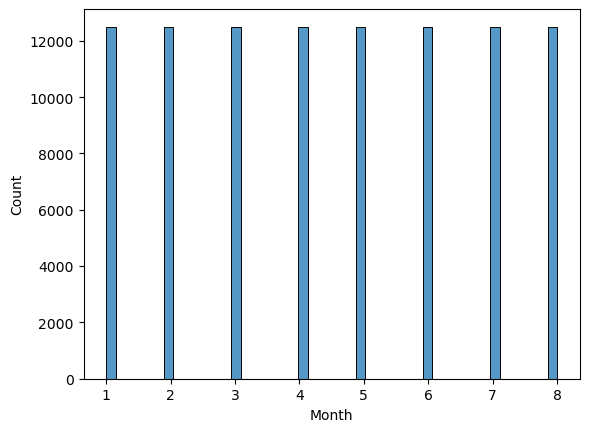

In [26]:
#MIESIACE
sns.histplot(df.Month)

<AxesSubplot:xlabel='Age', ylabel='Count'>

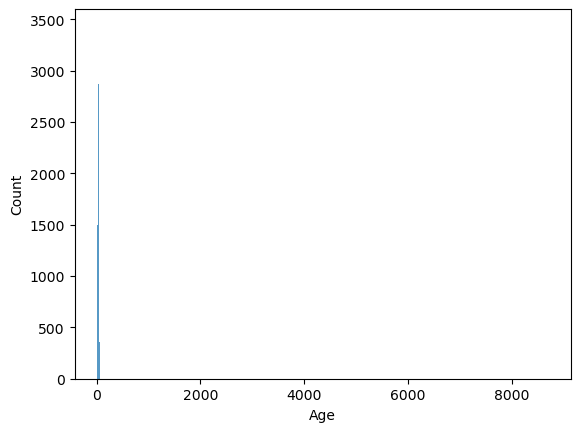

In [27]:
#WIEK
sns.histplot(df.Age)

In [28]:
upper_lim = df.Age.quantile(.98)
lower_lim = df.Age.quantile(.01)
df.Age = df.Age[(df.Age < upper_lim) & (df.Age > lower_lim)]

<AxesSubplot:xlabel='Age', ylabel='Count'>

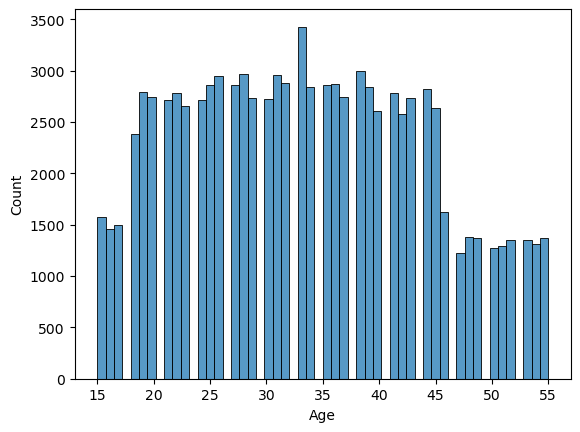

In [29]:
sns.histplot(df.Age)

<AxesSubplot:xlabel='Annual_Income', ylabel='Count'>

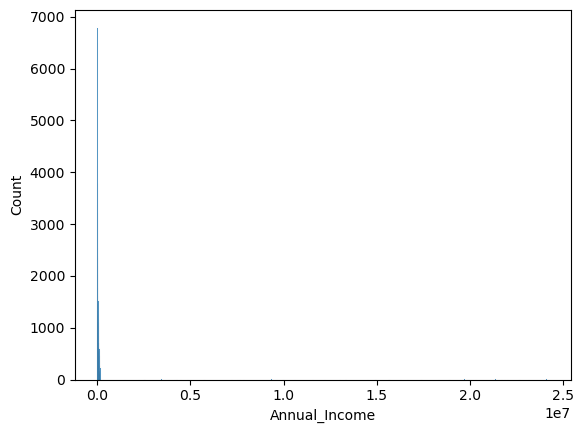

In [30]:
#PRZYCHOD ROCZNY
sns.histplot(df.Annual_Income)

<AxesSubplot:xlabel='Annual_Income', ylabel='Count'>

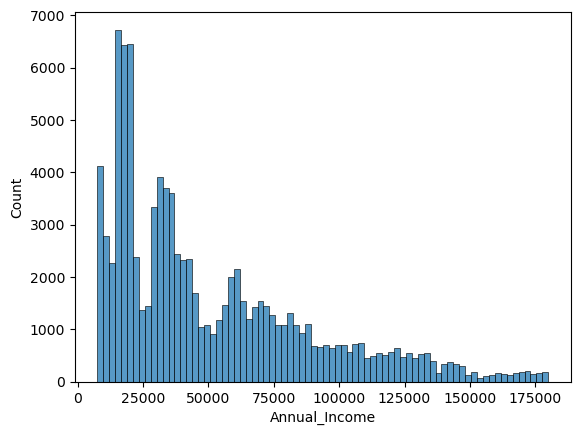

In [31]:
upper_lim = df.Annual_Income.quantile(.99)
lower_lim = df.Annual_Income.quantile(.01)
df.Annual_Income = df.Annual_Income[(df.Annual_Income < upper_lim) & (df.Annual_Income > lower_lim)]
sns.histplot(df.Annual_Income)

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Count'>

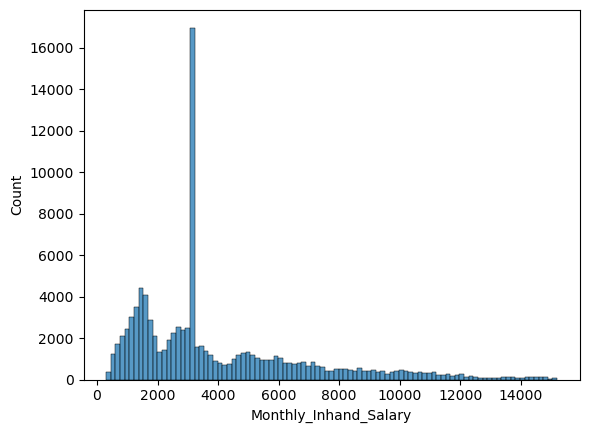

In [32]:
#PRZYCHOD MIESIECZNY
sns.histplot(df.Monthly_Inhand_Salary)

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Count'>

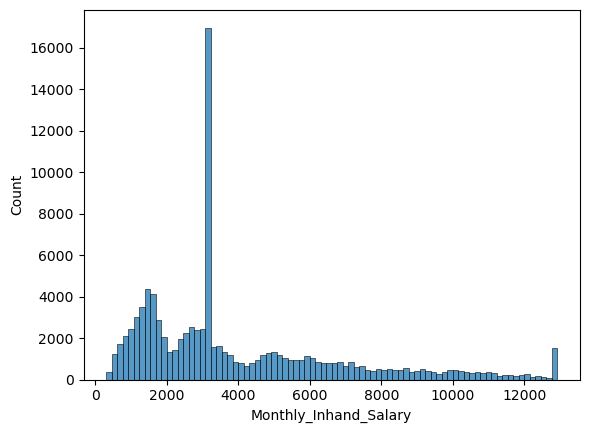

In [33]:
upper_lim = df['Monthly_Inhand_Salary'].mean () + df['Monthly_Inhand_Salary'].std () * factor
lower_lim = df['Monthly_Inhand_Salary'].mean () - df['Monthly_Inhand_Salary'].std () * factor
df['Monthly_Inhand_Salary'] = np.where(df['Monthly_Inhand_Salary'] < upper_lim, df['Monthly_Inhand_Salary'], upper_lim)
df['Monthly_Inhand_Salary'] = np.where(df['Monthly_Inhand_Salary'] > lower_lim, df['Monthly_Inhand_Salary'], lower_lim)
sns.histplot(df.Monthly_Inhand_Salary)

<AxesSubplot:xlabel='Num_Bank_Accounts', ylabel='Count'>

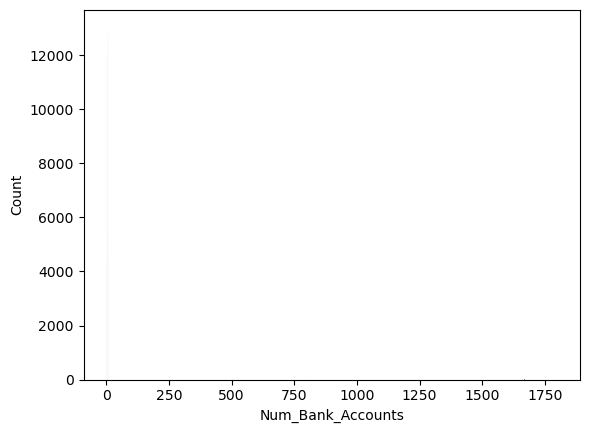

In [34]:
#ILE KONT
sns.histplot(df.Num_Bank_Accounts)

<AxesSubplot:xlabel='Num_Bank_Accounts', ylabel='Count'>

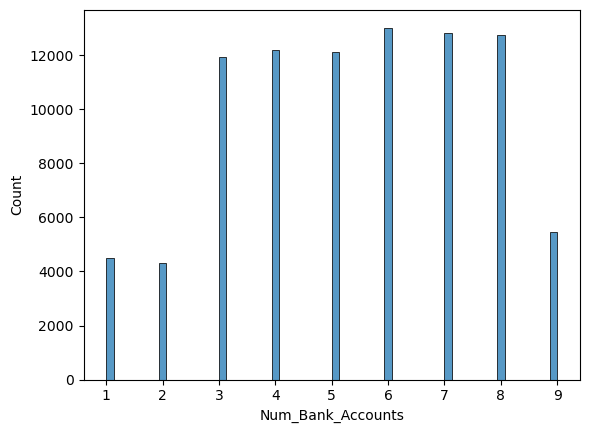

In [35]:
upper_lim = df.Num_Bank_Accounts.quantile(.98)
lower_lim = df.Num_Bank_Accounts.quantile(.00)
df.Num_Bank_Accounts = df.Num_Bank_Accounts[(df.Num_Bank_Accounts < upper_lim) & (df.Num_Bank_Accounts > lower_lim)]
sns.histplot(df.Num_Bank_Accounts)

<AxesSubplot:xlabel='Num_Credit_Card', ylabel='Count'>

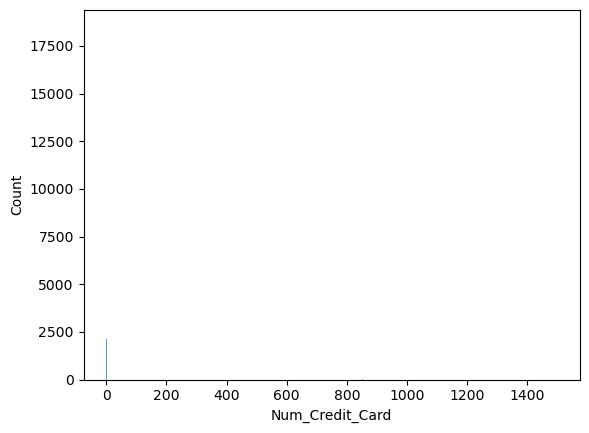

In [36]:
#ILE KART
sns.histplot(df.Num_Credit_Card)

<AxesSubplot:xlabel='Num_Credit_Card', ylabel='Count'>

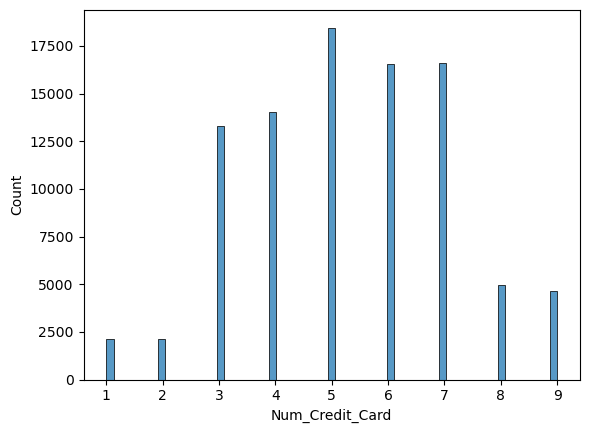

In [37]:
upper_lim = df.Num_Credit_Card.quantile(.97)
lower_lim = df.Num_Credit_Card.quantile(.00)
df.Num_Credit_Card = df.Num_Credit_Card[(df.Num_Credit_Card < upper_lim) & (df.Num_Credit_Card > lower_lim)]
sns.histplot(df.Num_Credit_Card)

<AxesSubplot:xlabel='Interest_Rate', ylabel='Count'>

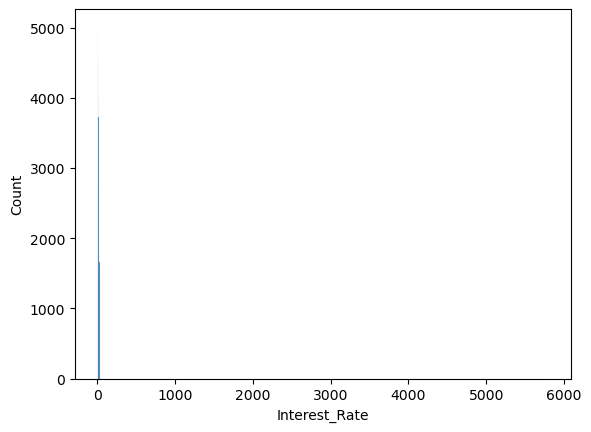

In [38]:
#JAKIE ODSETKI
sns.histplot(df.Interest_Rate)

<AxesSubplot:xlabel='Interest_Rate', ylabel='Count'>

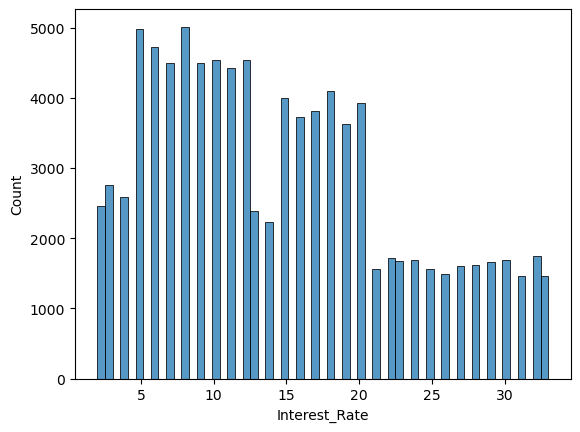

In [39]:
upper_lim = df.Interest_Rate.quantile(.97)
lower_lim = df.Interest_Rate.quantile(.02)
df.Interest_Rate = df.Interest_Rate[(df.Interest_Rate < upper_lim) & (df.Interest_Rate > lower_lim)]
sns.histplot(df.Interest_Rate)

<AxesSubplot:xlabel='Num_of_Loan', ylabel='Count'>

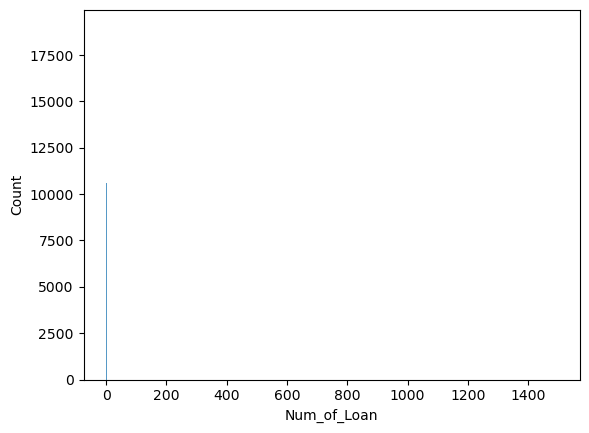

In [40]:
#ILE PORZYCZEK
sns.histplot(df.Num_of_Loan)

<AxesSubplot:xlabel='Num_of_Loan', ylabel='Count'>

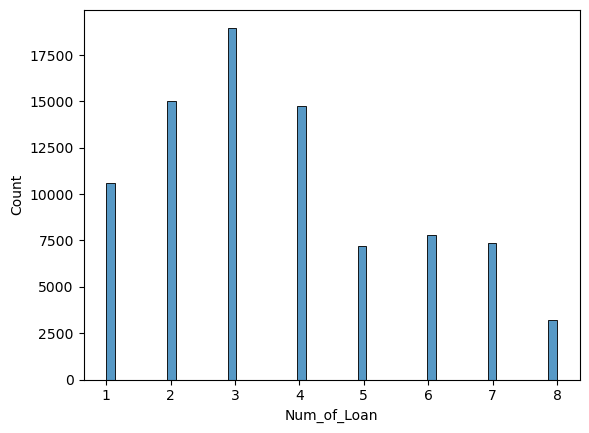

In [41]:
upper_lim = df.Num_of_Loan.quantile(.99)
lower_lim = df.Num_of_Loan.quantile(.00)
df.Num_of_Loan = df.Num_of_Loan[(df.Num_of_Loan < upper_lim) & (df.Num_of_Loan > lower_lim)]
sns.histplot(df.Num_of_Loan)

<AxesSubplot:xlabel='Delay_from_due_date', ylabel='Count'>

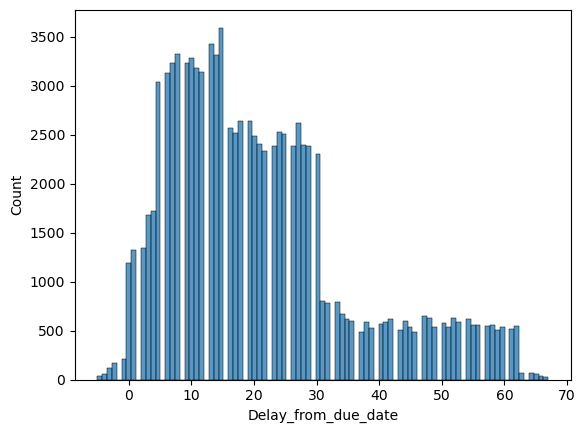

In [42]:
#ŚREDNIA OBSÓWA
sns.histplot(df.Delay_from_due_date)

<AxesSubplot:xlabel='Delay_from_due_date', ylabel='Count'>

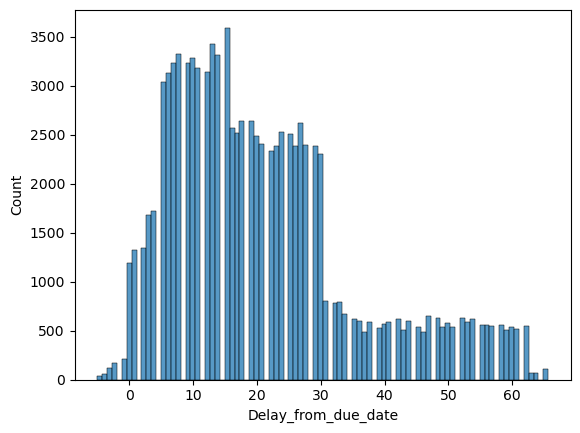

In [43]:
upper_lim = df['Delay_from_due_date'].mean () + df['Delay_from_due_date'].std () * factor
lower_lim = df['Delay_from_due_date'].mean () - df['Delay_from_due_date'].std () * factor
df['Delay_from_due_date'] = np.where(df['Delay_from_due_date'] < upper_lim, df['Delay_from_due_date'], upper_lim)
df['Delay_from_due_date'] = np.where(df['Delay_from_due_date'] > lower_lim, df['Delay_from_due_date'], lower_lim)
sns.histplot(df.Delay_from_due_date)

<AxesSubplot:xlabel='Num_of_Delayed_Payment', ylabel='Count'>

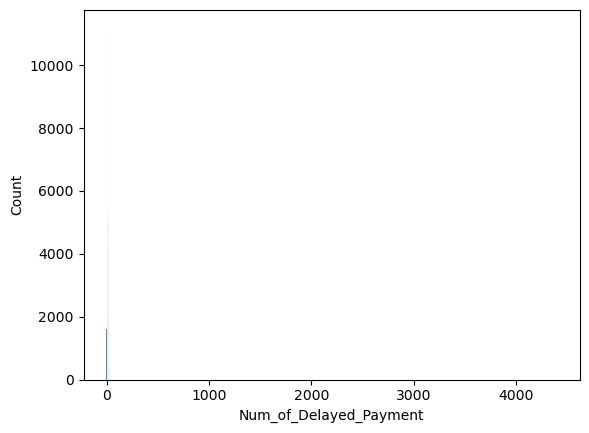

In [44]:
#ILE OBSÓW
sns.histplot(df.Num_of_Delayed_Payment)

<AxesSubplot:xlabel='Num_of_Delayed_Payment', ylabel='Count'>

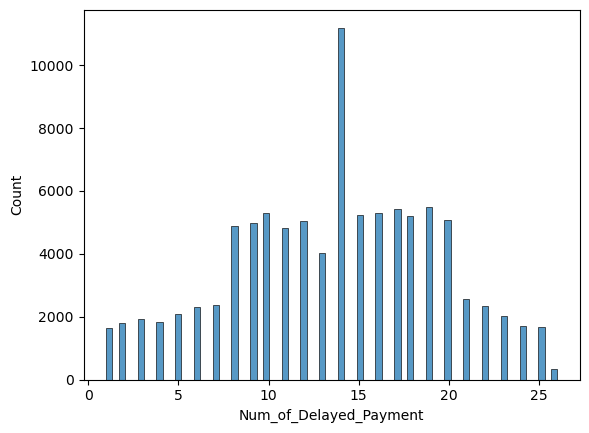

In [45]:
upper_lim = df.Num_of_Delayed_Payment.quantile(.99)
lower_lim = df.Num_of_Delayed_Payment.quantile(.01)
df.Num_of_Delayed_Payment = df.Num_of_Delayed_Payment[(df.Num_of_Delayed_Payment < upper_lim) & (df.Num_of_Delayed_Payment > lower_lim)]
sns.histplot(df.Num_of_Delayed_Payment)

In [46]:
df.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score', 'spent',
       'payment_value', 'Auto Loan', 'Credit-Builder Loan',
       'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
       'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan'],
      dtype='object')

In [47]:
df.drop(columns=['Personal Loan','Student Loan','Payday Loan','Not Specified','Mortgage Loan', 'Home Equity Loan', 
                 'Debt Consolidation Loan', 'Credit-Builder Loan', 'Auto Loan' ], inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       96568 non-null   float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             97993 non-null   float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         89101 non-null   float64
 6   Num_Credit_Card           92820 non-null   float64
 7   Interest_Rate             93781 non-null   float64
 8   Num_of_Loan               84896 non-null   float64
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    96630 non-null   float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                79805 non-null   fl

In [49]:
df.corr()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,spent,payment_value
Month,1.000000e+00,0.007167,0.000424,-0.002308,-0.000584,-0.000471,0.000329,-0.001518,0.000244,-0.000219,...,3.200578e-17,0.002440,0.021677,0.001287,0.001371,0.003094,-0.002602,0.016291,-0.004264,0.002736
Age,7.167127e-03,1.000000,0.081706,0.075247,-0.146074,-0.120275,-0.199351,-0.179865,-0.164447,-0.159486,...,-1.926262e-01,0.022956,0.212152,-0.153313,0.001419,0.049663,0.106909,0.149856,0.020723,-0.026805
Annual_Income,4.242501e-04,0.081706,1.000000,0.909120,-0.252558,-0.184554,-0.288011,-0.225516,-0.244677,-0.266833,...,-2.623345e-01,0.176074,0.255126,-0.191612,0.008474,0.585960,0.691765,0.206703,0.216546,-0.257561
Monthly_Inhand_Salary,-2.308274e-03,0.075247,0.909120,1.000000,-0.228340,-0.171754,-0.268956,-0.210675,-0.227481,-0.244059,...,-2.472384e-01,0.157500,0.238792,-0.175305,0.006857,0.541884,0.627376,0.190652,0.203752,-0.237941
Num_Bank_Accounts,-5.838440e-04,-0.146074,-0.252558,-0.228340,1.000000,0.355735,0.515043,0.380314,0.514791,0.511776,...,4.516787e-01,-0.062512,-0.406577,0.324466,-0.004441,-0.156306,-0.261962,-0.359790,-0.057597,0.063265
Num_Credit_Card,-4.708747e-04,-0.120275,-0.184554,-0.171754,0.355735,1.000000,0.442534,0.340876,0.430829,0.366557,...,4.381379e-01,-0.049417,-0.350080,0.237351,-0.004982,-0.115864,-0.204534,-0.376941,-0.040625,0.053873
Interest_Rate,3.289148e-04,-0.199351,-0.288011,-0.268956,0.515043,0.442534,1.000000,0.492731,0.579100,0.526822,...,6.235735e-01,-0.074122,-0.541677,0.375980,-0.005214,-0.179369,-0.317622,-0.479337,-0.071541,0.086180
Num_of_Loan,-1.518216e-03,-0.179865,-0.225516,-0.210675,0.380314,0.340876,0.492731,1.000000,0.445322,0.400354,...,5.812997e-01,-0.078804,-0.537102,0.298418,0.002220,-0.142710,-0.371776,-0.327446,-0.051763,0.069387
Delay_from_due_date,2.438205e-04,-0.164447,-0.244677,-0.227481,0.514791,0.430829,0.579100,0.445322,1.000000,0.509455,...,5.717310e-01,-0.063803,-0.469982,0.316223,-0.003886,-0.153159,-0.277524,-0.431602,-0.061840,0.071673
Num_of_Delayed_Payment,-2.186365e-04,-0.159486,-0.266833,-0.244059,0.511776,0.366557,0.526822,0.400354,0.509455,1.000000,...,4.821500e-01,-0.070861,-0.434355,0.339502,-0.003743,-0.161402,-0.287009,-0.346213,-0.066556,0.075044


<AxesSubplot:>

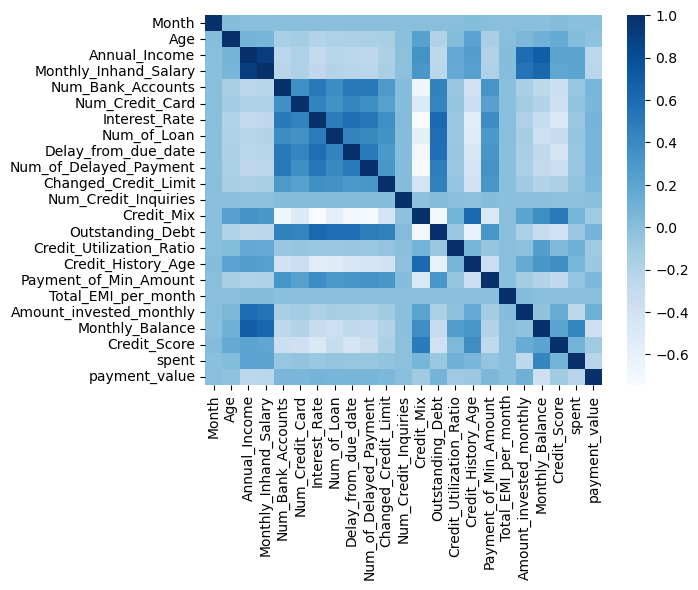

In [50]:
sns.heatmap(df.corr(), cmap="Blues", annot=False)